In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
current_file = Path().absolute()
data_folder = current_file.parent.parent
data_folder

PosixPath('/Users/dvidyasagar/Coding/ML')

In [3]:
files = os.listdir(data_folder)
for file in files:
    print(file)

linearregression
logistic-regression
.DS_Store
Machine-Learning-Specialization-Coursera
coding ninjas
kkn_practice
udemy-ML
.git
data
Codebasics
ScalarML


In [4]:
data_file = data_folder.joinpath('data/iris.csv')

In [5]:
iris = pd.read_csv(data_file)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
columns = ['ID', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
iris = pd.read_csv(data_file, names=columns)
iris.head()

,ID,sepal_length,sepal_width,petal_length,petal_width,species
0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa


In [9]:
iris.drop('ID', axis=1, inplace=True)
iris.drop(0, axis=0, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
def convert_columns(df, column):
    df[column] = df[column].astype(dtype=float)
    return df
columns = list(iris.columns)[:-1]
for col in columns:
    iris = convert_columns(iris, col)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
sns.set_style('whitegrid')

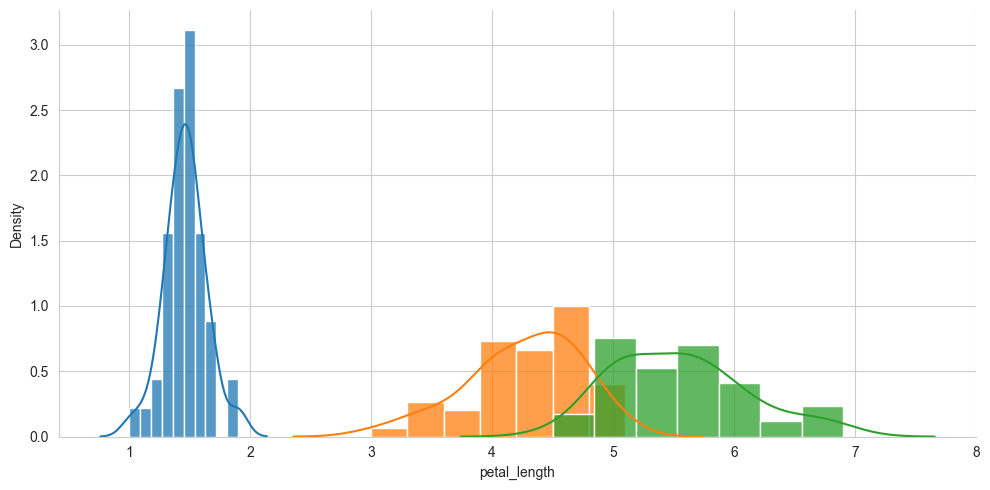

In [13]:
g = sns.FacetGrid(iris, hue='species', height=5, aspect=2)
g.map(sns.histplot, 'petal_length',stat='density')
g.map(sns.kdeplot, 'petal_length',common_norm=False)
plt.show()

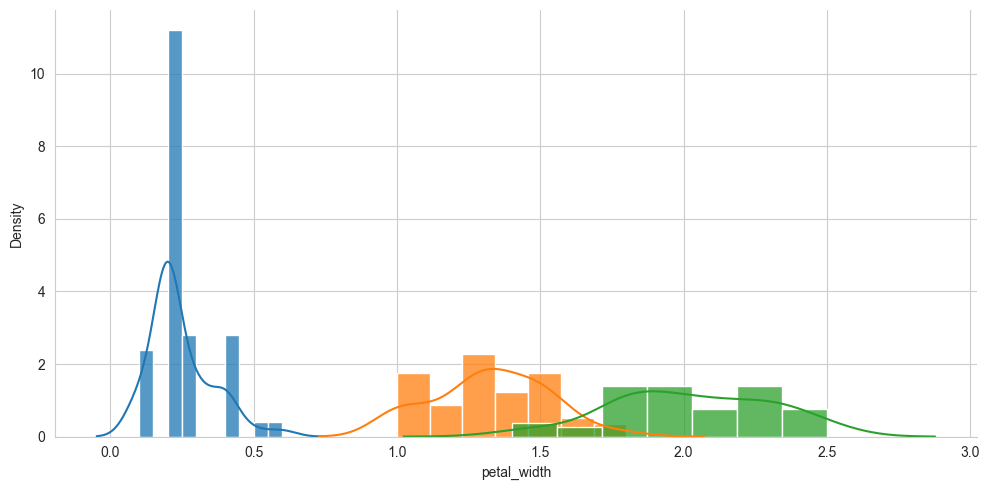

In [14]:
g = sns.FacetGrid(iris, hue='species', height=5, aspect=2)
g.map(sns.histplot, 'petal_width', stat='density')
g.map(sns.kdeplot, 'petal_width')
plt.show()

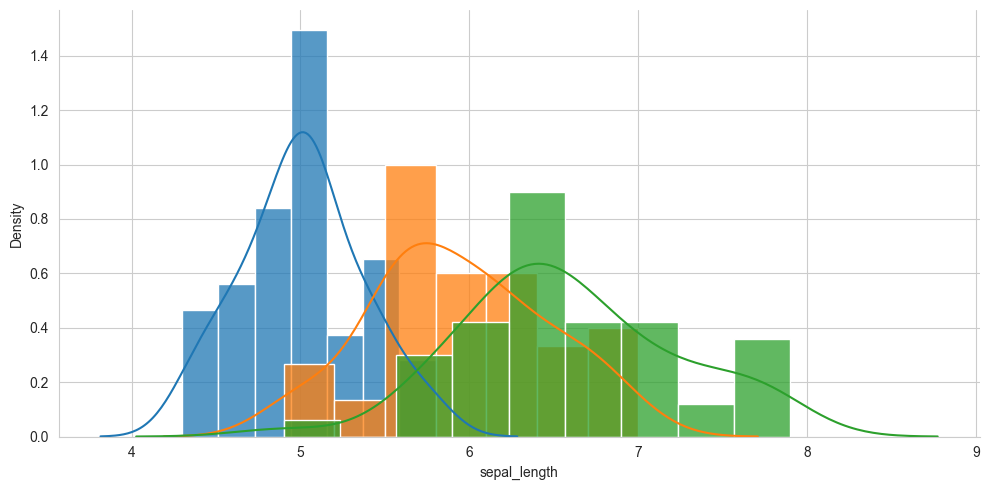

In [15]:
g = sns.FacetGrid(iris, hue='species', height=5, aspect=2)
g.map(sns.histplot, 'sepal_length', stat='density')
g.map(sns.kdeplot, 'sepal_length')
plt.show()

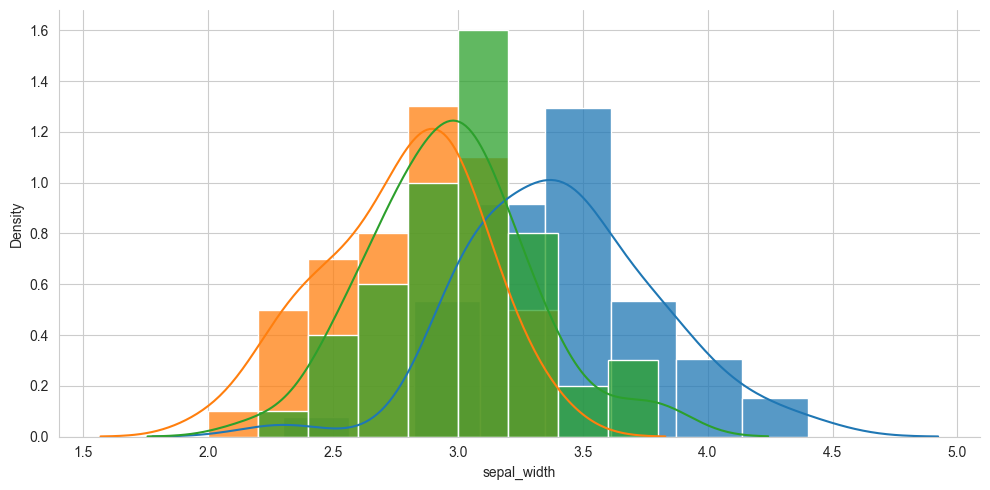

In [16]:
g = sns.FacetGrid(iris, hue='species', height=5, aspect=2)
g.map(sns.histplot, 'sepal_width', stat='density')
g.map(sns.kdeplot, 'sepal_width')
plt.show()

# Lets do Univariate Analysis - One variable Analysis
* which of the four varibles is more usefull than the others then I would use univariate analysis.
* observer all the graphs, lets find out the which feature is more usefull to classify them.

## petal length
* setosa is perfectly seperable
* virginica and versicolor are have some overlap but okay, not too much

## petal width
* setosa is fairly seperable
* virginica and versicolor are little bit less overlap than petal length

## sepal length
* it have massive overlap.
* even setosa is not separable.

## sepal width
* you don't have to talk about it.
* it is really bad.

## PL > PW >> SL >> SW